IRIS Classification

In [1]:
# Importing Libraries

import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Loading Dataset and creating dataframe

df = pd.read_csv('Downloads/DS/IRIS/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Dropping Column "Id" for further Analysis

df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Checking Missing Values

missing = df.isnull().sum()
missing

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Checking Duplicate Data

df.duplicated().sum()

np.int64(3)

In [7]:
# Handling Duplicate Data

df.drop_duplicates(inplace=True)

In [8]:
# Descriptive Analysis

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


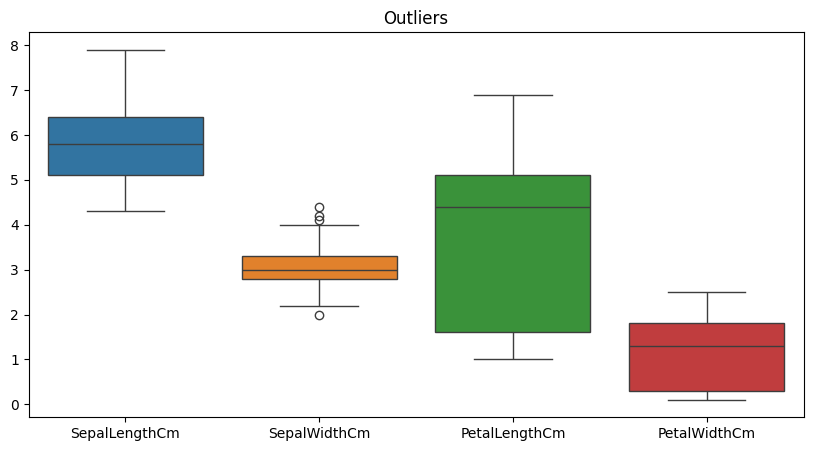

In [9]:
# Plotting Box Plot

plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Outliers")
plt.show()

In [10]:
# Finding Correlation

num_columns=df.select_dtypes(include=['number'])
cor_matrix = num_columns.corr()
cor_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


Text(0.5, 1.0, 'Correlation')

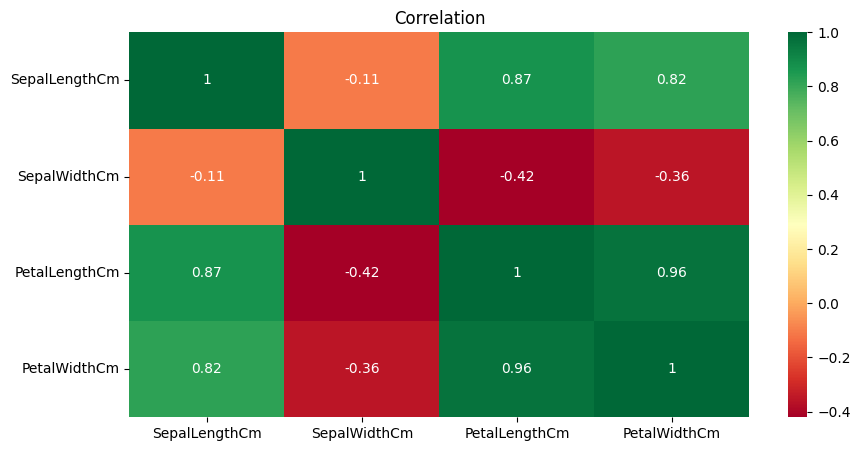

In [11]:
# Plotting Correlation Matrix

plt.figure(figsize=(10,5))
sns.heatmap(cor_matrix, annot=True, cmap='RdYlGn')
plt.title("Correlation")

In [12]:
# Count of species

df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [13]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

<Figure size 1000x500 with 0 Axes>

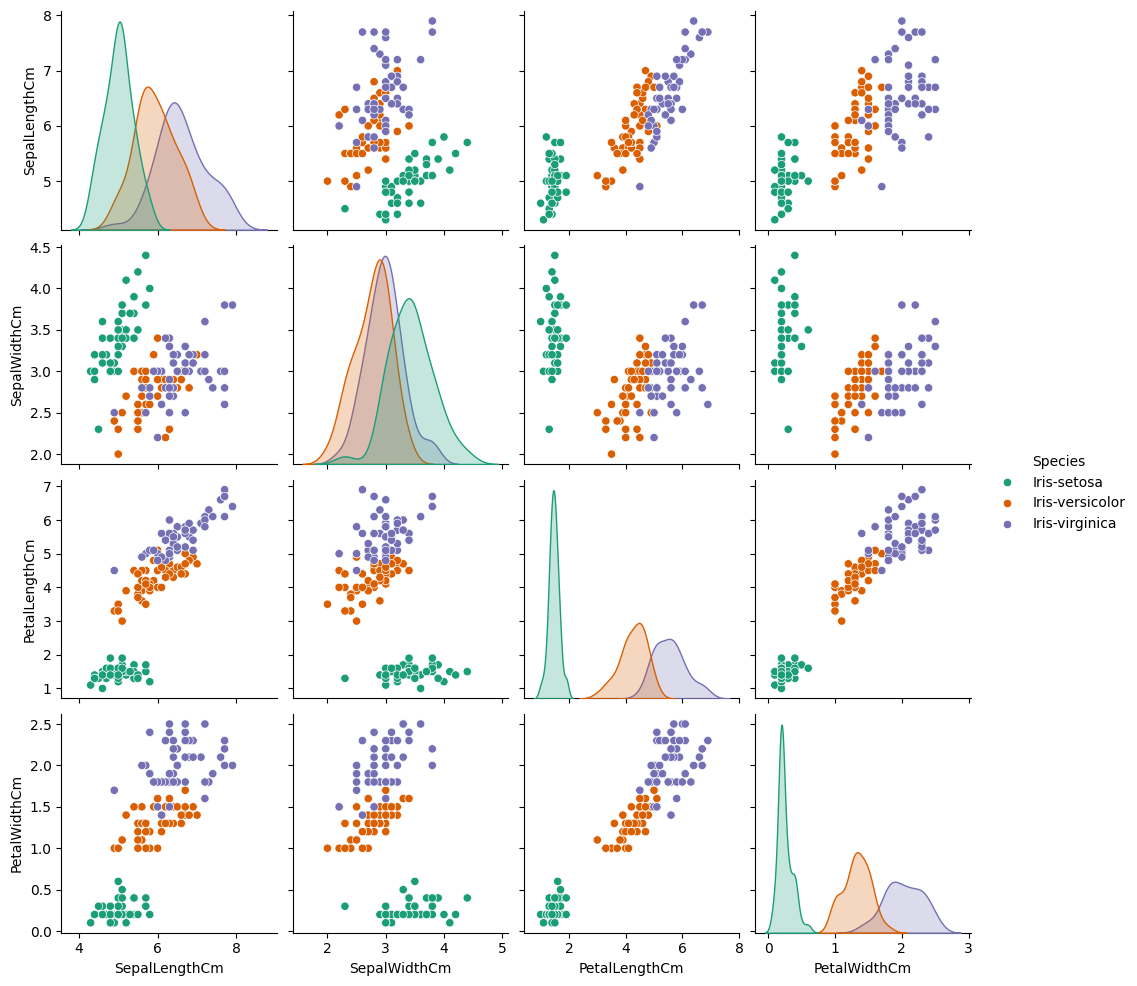

In [14]:
# Visualization

plt.figure(figsize=(10,5))
sns.pairplot(df, hue = 'Species', palette= 'Dark2')
plt.show()

### Model Building ###

In [15]:
x = df.drop('Species', axis=1)
y= df['Species']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
# Logistic Regression and model training

lg = LogisticRegression()
clf = lg.fit(x_train, y_train)

In [17]:
# Printing Predicted Accuracy of the model

y_pred = clf.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.9333333333333333


In [18]:
# Classification Report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [19]:
# Saving the Model

import pickle

with open('iris_model.pkl', 'wb') as file:
    pickle.dump(clf, file)